# DataCamp Certification Case Study

### Project Brief

A housing rental company has hired you for a new project. They are interested in developing an application to help people estimate the money they could earn renting out their living space.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings to the head of rentals, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE



### Data Collection 

In [2]:
rentals_df = pd.read_csv("data/rentals.csv")
rentals_df.head()
print(f"Number of rows/records: {rentals_df.shape[0]}")
print(f"Number of columns/variables: {rentals_df.shape[1]}")

Number of rows/records: 8111
Number of columns/variables: 9


In [3]:
rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


In [4]:
rentals_df.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights
count,8.111000e+03,8111.000000,8111.000000,8099.000000,8107.000000,8.111000e+03
mean,2.024561e+07,37.766054,-122.430107,1.395975,1.345874,1.234526e+04
std,1.228565e+07,0.022937,0.026967,0.923213,0.925298,1.110357e+06
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000e+00
25%,8.905668e+06,37.751450,-122.442830,1.000000,1.000000,2.000000e+00
50%,2.161057e+07,37.769150,-122.424650,1.000000,1.000000,4.000000e+00
75%,3.120025e+07,37.785670,-122.410615,1.500000,2.000000,3.000000e+01
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,1.000000e+08


In [5]:
rentals_df.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft',
       'Guest suite', 'Cottage', 'Hostel', 'Guesthouse',
       'Serviced apartment', 'Bungalow', 'Bed and breakfast', 'Hotel',
       'Boutique hotel', 'Other', 'Tiny house', 'Resort', 'Villa',
       'Aparthotel', 'Castle', 'Camper/RV', 'In-law', 'Earth house',
       'Cabin', 'Dome house', 'Hut'], dtype=object)

In [6]:
rentals_df[rentals_df.property_type == 'Other'].count()

id                24
latitude          24
longitude         24
property_type     24
room_type         24
bathrooms         24
bedrooms          24
minimum_nights    24
price             24
dtype: int64

In [7]:
rentals_df[rentals_df.property_type == 'Other'].sample(10)

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
5943,30531625,37.75531,-122.39954,Other,Private room,1.0,1.0,1,$199.00
3735,20257125,37.74583,-122.49027,Other,Private room,1.0,1.0,1,$99.00
1925,8195090,37.75377,-122.44197,Other,Entire home/apt,1.0,0.0,2,$135.00
4419,23217998,37.76103,-122.43501,Other,Private room,1.0,1.0,1,$125.00
3341,17892443,37.78631,-122.41396,Other,Private room,8.0,0.0,1,$70.00
5707,30064254,37.71659,-122.39672,Other,Private room,1.0,1.0,1,$99.00
4391,23095049,37.75966,-122.43481,Other,Private room,2.0,1.0,1,$225.00
5942,30531508,37.75550,-122.39986,Other,Private room,1.5,1.0,1,$269.00
4395,23121061,37.76111,-122.43431,Other,Private room,1.0,1.0,1,$175.00
5357,28004855,37.79255,-122.39295,Other,Entire home/apt,1.0,1.0,30,$215.00


In [8]:
rentals_df[rentals_df['bathrooms'] == 0.0].sample(10)

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
3019,15904098,37.78859,-122.40528,Boutique hotel,Hotel room,0.0,1.0,32,$59.00
3641,19611889,37.76286,-122.47747,Apartment,Private room,0.0,1.0,30,$49.00
6646,33272979,37.78563,-122.41033,Hostel,Private room,0.0,1.0,32,$49.00
1321,4519780,37.79883,-122.40474,Bed and breakfast,Shared room,0.0,1.0,1,$38.00
4267,22534933,37.80069,-122.42399,House,Private room,0.0,1.0,30,$85.00
2114,9495318,37.79934,-122.40609,Bed and breakfast,Private room,0.0,1.0,1,$95.00
2549,13022499,37.72498,-122.40501,House,Private room,0.0,1.0,1,$65.00
3325,17794777,37.78677,-122.40867,Apartment,Private room,0.0,1.0,7,$75.00
112,96383,37.79176,-122.42476,Apartment,Private room,0.0,1.0,30,$59.00
3028,15957963,37.78895,-122.40480,Boutique hotel,Hotel room,0.0,1.0,32,$49.00


In [9]:
rentals_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [10]:
#Verifying if there are any null values in the dataset.
rentals_df.isna().sum()

id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

In [11]:
#Investigating the null bathrooms
rentals_df[rentals_df['bathrooms'].isna()]   #144978 786506

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
139,144978,37.79336,-122.42506,Apartment,Private room,NaN,1.0,30,$56.00
181,229240,37.79341,-122.40340,Hostel,Shared room,NaN,1.0,1,$45.00
196,259621,37.79470,-122.40374,Hostel,Shared room,NaN,1.0,1,$45.00
197,259622,37.79441,-122.40473,Hostel,Shared room,NaN,1.0,1,$45.00
267,430692,37.75906,-122.40761,Apartment,Private room,NaN,1.0,31,$68.00
352,596042,37.79384,-122.42436,Apartment,Private room,NaN,1.0,30,$63.00
434,785901,37.79313,-122.40443,Hostel,Shared room,NaN,1.0,1,$45.00
435,786492,37.79421,-122.40310,Hostel,Shared room,NaN,1.0,1,$45.00
436,786506,37.79260,-122.40339,Hostel,Shared room,NaN,1.0,1,$45.00
539,1031899,37.74833,-122.42621,Apartment,Entire home/apt,NaN,1.0,30,$127.00


In [12]:
#Investigating null bedrooms.
rentals_df[rentals_df['bedrooms'].isna()]

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
269,431862,37.78321,-122.41969,Apartment,Entire home/apt,1.0,NaN,30,$124.00
6301,32183178,37.78883,-122.48640,House,Entire home/apt,3.5,NaN,30,$650.00
7786,38329898,37.78347,-122.41669,Apartment,Entire home/apt,1.0,NaN,30,$75.00
7840,38550933,37.78979,-122.41994,Apartment,Entire home/apt,1.0,NaN,30,$108.00


In [13]:
rentals_df = rentals_df.dropna()
rentals_df.isna().sum()

id                0
latitude          0
longitude         0
property_type     0
room_type         0
bathrooms         0
bedrooms          0
minimum_nights    0
price             0
dtype: int64

In [14]:
rentals_df.shape

(8095, 9)

Converting the price column to float from string. Inorder to do this we will need to substitute the '$' & ',' characters and then convert the datatype as a numeric value.

In [15]:
rentals_df['price'] = rentals_df['price'].apply(lambda x: x.replace('$',''))
rentals_df['price'] = rentals_df['price'].str.strip()
rentals_df['price'] = rentals_df['price'].apply(lambda x: x.replace(',',''))

In [16]:
rentals_df.price = rentals_df.price.astype(float)
rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8095 non-null   int64  
 1   latitude        8095 non-null   float64
 2   longitude       8095 non-null   float64
 3   property_type   8095 non-null   object 
 4   room_type       8095 non-null   object 
 5   bathrooms       8095 non-null   float64
 6   bedrooms        8095 non-null   float64
 7   minimum_nights  8095 non-null   int64  
 8   price           8095 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 632.4+ KB


### Data Visualization

Now that we have a clean dataset we can start correlating the values and compare them against price. 

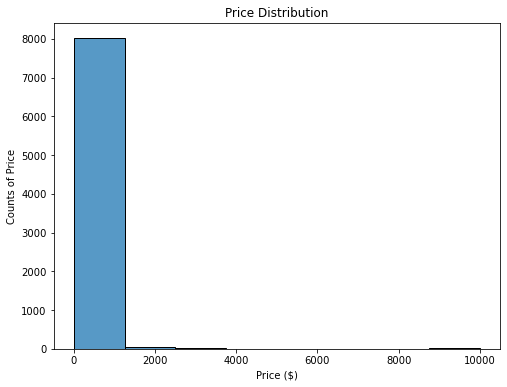

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(x='price',data=rentals_df,bins=8)
plt.xlabel('Price ($)')
plt.ylabel('Counts of Price')
plt.title('Price Distribution')
plt.show()

In [18]:
counts_2k = rentals_df[rentals_df['price'] < 2000].count()
print(counts_2k)

id                8058
latitude          8058
longitude         8058
property_type     8058
room_type         8058
bathrooms         8058
bedrooms          8058
minimum_nights    8058
price             8058
dtype: int64


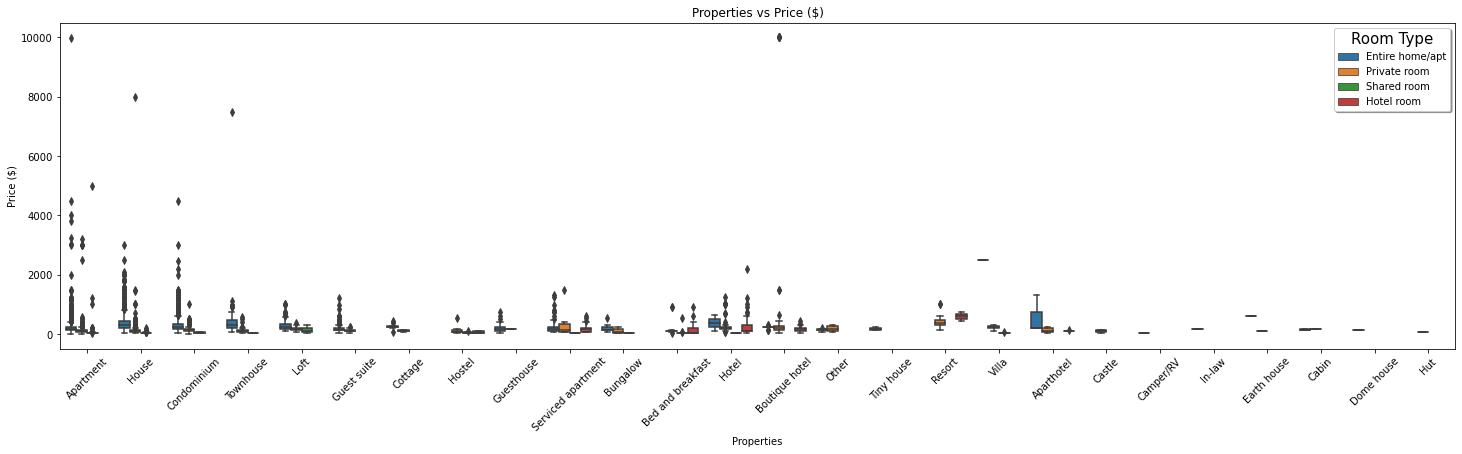

In [19]:
fig, ax = plt.subplots(figsize=(25, 6))
scatter = sns.boxplot(x='property_type',y='price',data=rentals_df,hue='room_type')
plt.xticks(rotation=45)
plt.xlabel('Properties')
plt.ylabel('Price ($)')
scatter.legend(fontsize = 10,
               title="Room Type", 
               title_fontsize = 15, 
               shadow = True, 
               facecolor = 'white')
plt.title('Properties vs Price ($)')
plt.show()

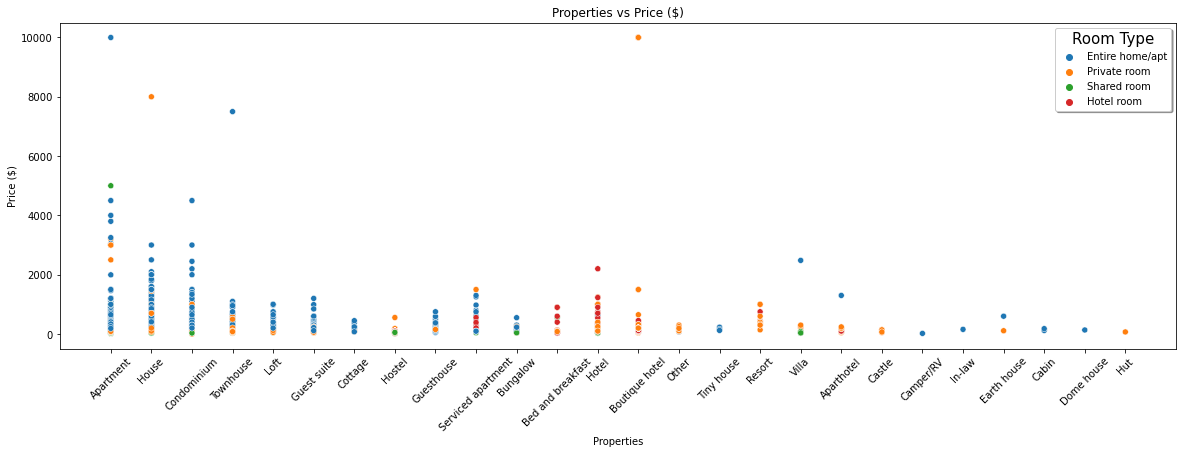

In [20]:
fig, ax = plt.subplots(figsize=(20, 6))
scatter = sns.scatterplot(x='property_type',y='price',data=rentals_df,hue='room_type')
plt.xticks(rotation=45)
plt.xlabel('Properties')
plt.ylabel('Price ($)')
scatter.legend(fontsize = 10,
               title="Room Type", 
               title_fontsize = 15, 
               shadow = True, 
               facecolor = 'white')
plt.title('Properties vs Price ($)')
plt.show()

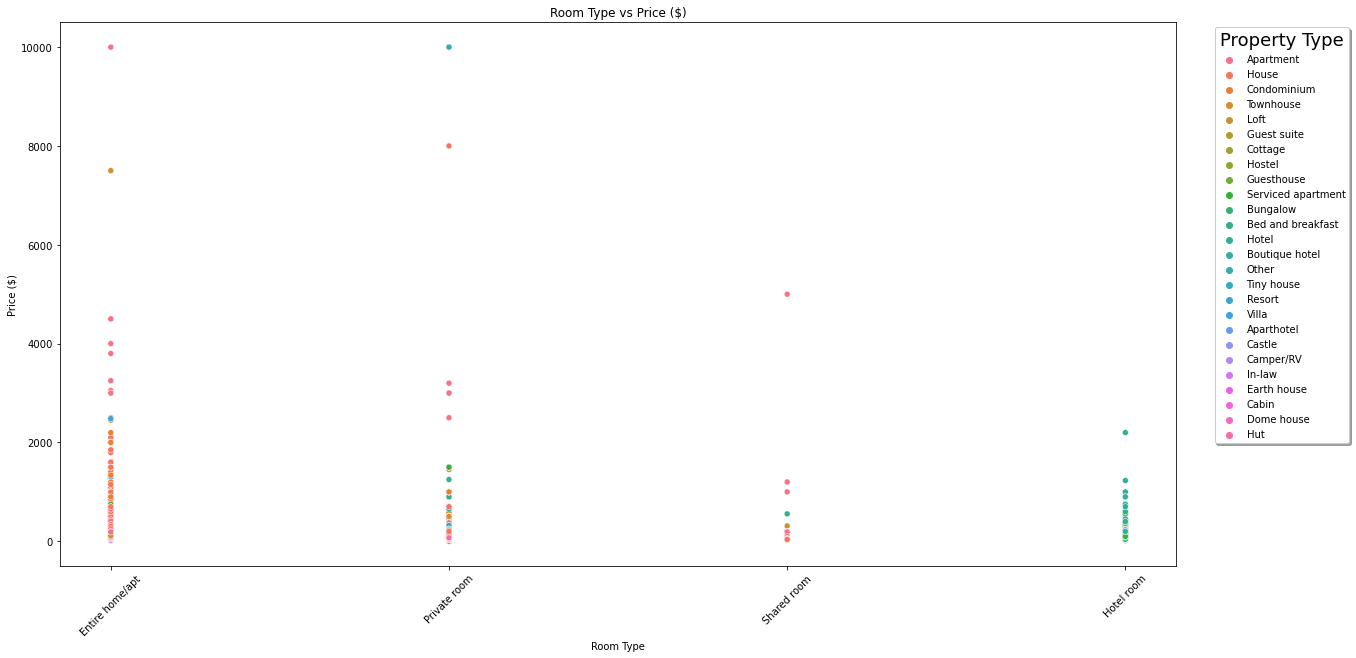

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
scatter = sns.scatterplot(x='room_type',y='price',data=rentals_df,hue='property_type')
plt.xticks(rotation=45)
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
scatter.legend(fontsize = 10,
               bbox_to_anchor= (1.03, 1), 
               title="Property Type", 
               title_fontsize = 18, 
               shadow = True, 
               facecolor = 'white')
plt.title('Room Type vs Price ($)')
plt.show()

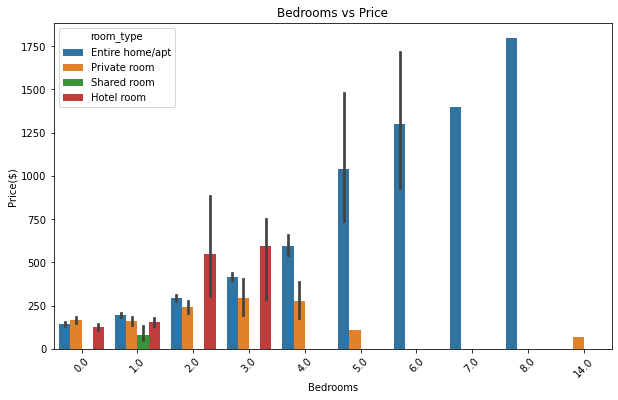

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='bedrooms',y='price',data=rentals_df,hue='room_type')
plt.xticks(rotation=45)
plt.xlabel('Bedrooms')
plt.ylabel('Price($)')
plt.title('Bedrooms vs Price')
plt.show()

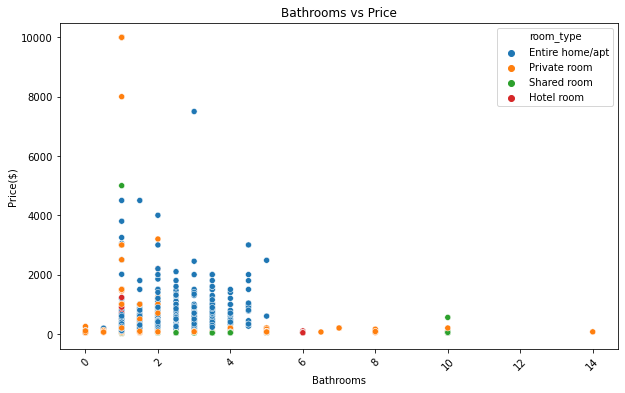

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='bathrooms',y='price',data=rentals_df,hue='room_type')
plt.xticks(rotation=45)
plt.xlabel('Bathrooms')
plt.ylabel('Price($)')
plt.title('Bathrooms vs Price')
plt.show()

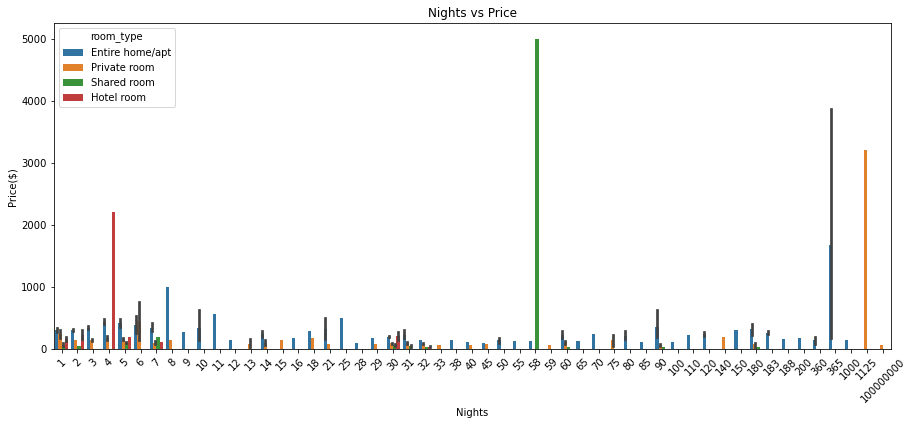

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='minimum_nights',y='price',data=rentals_df,hue='room_type')
plt.xticks(rotation=45)
plt.xlabel('Nights')
plt.ylabel('Price($)')
plt.title('Nights vs Price')
plt.show()

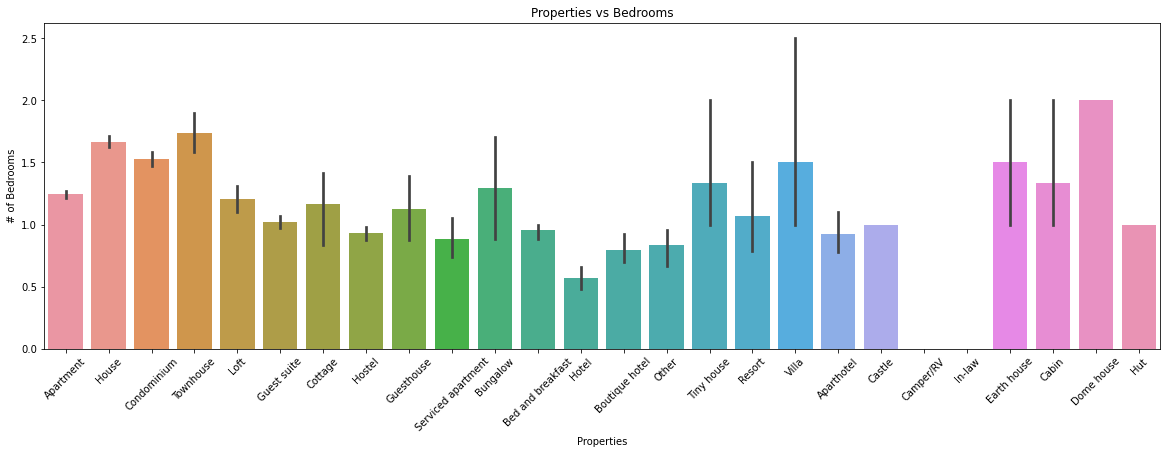

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='property_type',y='bedrooms',data=rentals_df)
plt.xticks(rotation=45)
plt.xlabel('Properties')
plt.ylabel('# of Bedrooms')
plt.title('Properties vs Bedrooms')
plt.show()

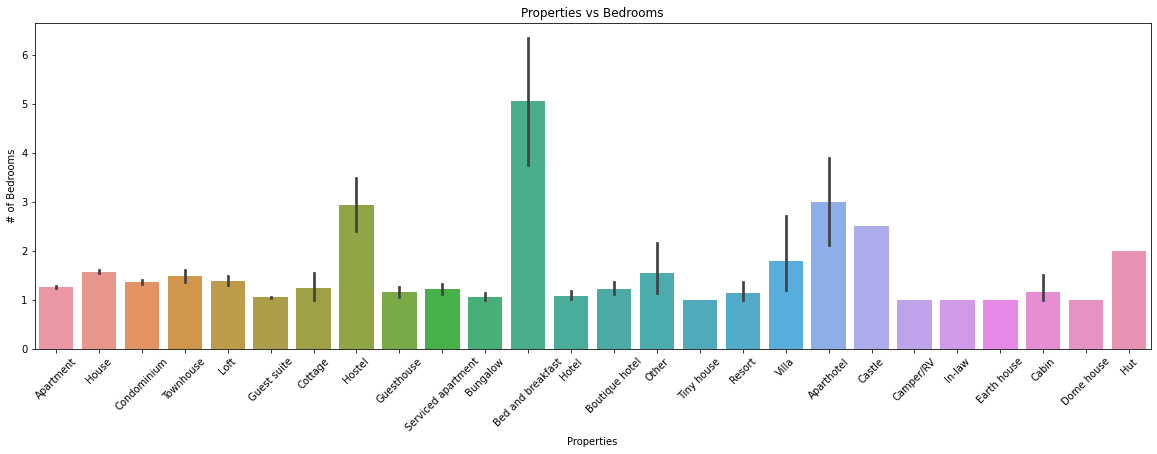

In [26]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='property_type',y='bathrooms',data=rentals_df)
plt.xticks(rotation=45)
plt.xlabel('Properties')
plt.ylabel('# of Bedrooms')
plt.title('Properties vs Bedrooms')
plt.show()

In [27]:
property_df = rentals_df.groupby('property_type').size().reset_index(name='counts')


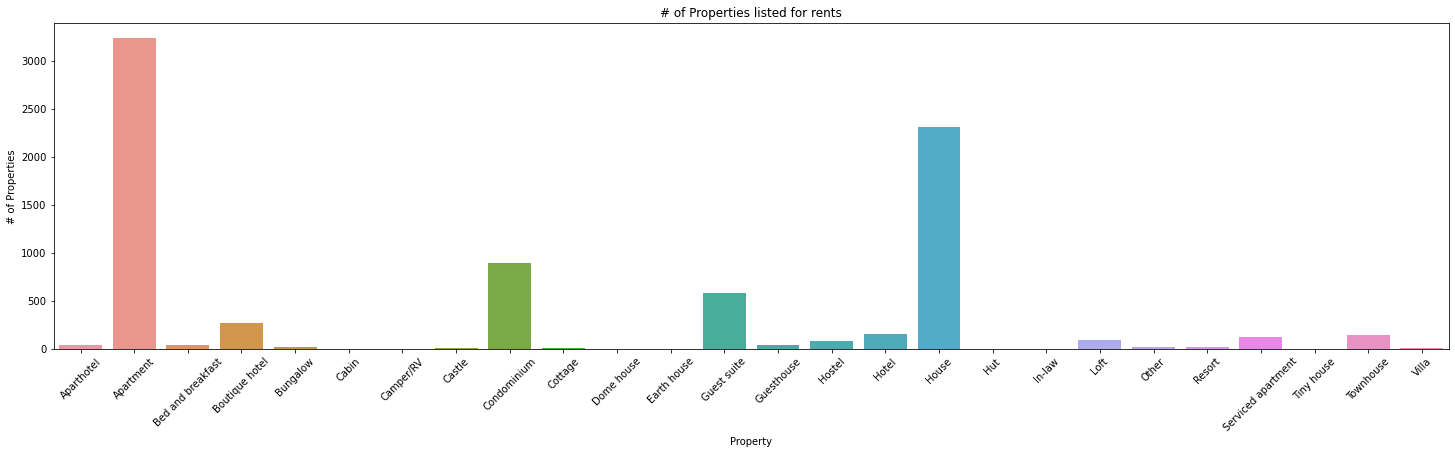

In [28]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x='property_type',y='counts',data=property_df)
plt.xticks(rotation=45)
plt.xlabel('Property')
plt.ylabel('# of Properties')
plt.title('# of Properties listed for rents')
plt.show()

In [29]:
compare_cols = ['bedrooms','bathrooms','room_type','property_type','minimum_nights']

In [30]:
for col in compare_cols:
    print('Counts of ', col)
    display(rentals_df.groupby(col).size().reset_index(name='counts'))  
    print()

Counts of  bedrooms


,bedrooms,counts
0,0.0,854
1,1.0,4833
2,2.0,1472
3,3.0,694
4,4.0,193
5,5.0,37
6,6.0,9
7,7.0,1
8,8.0,1
9,14.0,1



Counts of  bathrooms


,bathrooms,counts
0,0.0,38
1,0.5,17
2,1.0,5668
3,1.5,579
4,2.0,1111
5,2.5,234
6,3.0,149
7,3.5,62
8,4.0,61
9,4.5,14



Counts of  room_type


,room_type,counts
0,Entire home/apt,4767
1,Hotel room,207
2,Private room,2886
3,Shared room,235



Counts of  property_type


,property_type,counts
0,Aparthotel,41
1,Apartment,3234
2,Bed and breakfast,43
3,Boutique hotel,267
4,Bungalow,17
5,Cabin,3
6,Camper/RV,1
7,Castle,4
8,Condominium,892
9,Cottage,12



Counts of  minimum_nights


,minimum_nights,counts
0,1,1422
1,2,1553
2,3,863
3,4,322
4,5,216
5,6,36
6,7,74
7,8,2
8,9,1
9,10,4


### Exploring outliners and preparing the dataset for training the model.

In [31]:
expensive_properties = rentals_df[rentals_df.price > 7500]
expensive_properties

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
57,51374,37.76519,-122.45613,Apartment,Entire home/apt,1.0,2.0,365,9999.0
2818,14887262,37.74255,-122.47917,House,Private room,1.0,1.0,1,8000.0
7345,36185102,37.78898,-122.41659,Boutique hotel,Private room,1.0,1.0,1,10000.0
7346,36185260,37.79240,-122.42060,Boutique hotel,Private room,1.0,1.0,1,10000.0
7347,36185321,37.79404,-122.42202,Boutique hotel,Private room,1.0,1.0,1,10000.0
7348,36185365,37.79196,-122.42184,Boutique hotel,Private room,1.0,1.0,1,10000.0
7349,36185403,37.79396,-122.42200,Boutique hotel,Private room,1.0,1.0,1,10000.0
7350,36185434,37.79334,-122.42046,Boutique hotel,Private room,1.0,1.0,1,10000.0
7351,36185495,37.79341,-122.42051,Boutique hotel,Private room,1.0,1.0,1,10000.0


In [32]:
othertypes_df = rentals_df[rentals_df.property_type.isin(['In-law','Camper/RV','Dome house','Hut','Earth house','Cabin','Tiny house','Castle','Villa','Other','Cottage','Resort','Bungalow'])]
othertypes_df

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
73,59702,37.74209,-122.41409,Cottage,Private room,1.0,1.0,30,150.0
230,334339,37.76295,-122.44259,Cottage,Private room,1.0,1.0,3,99.0
316,517803,37.76794,-122.43906,Bungalow,Entire home/apt,1.5,2.0,5,550.0
424,769734,37.75634,-122.40976,Cottage,Private room,1.0,1.0,2,80.0
440,802559,37.71997,-122.45089,Bungalow,Entire home/apt,1.0,2.0,4,180.0
...,...,...,...,...,...,...,...,...,...
7660,37904794,37.75485,-122.43967,Cottage,Entire home/apt,1.0,1.0,3,240.0
7801,38383906,37.72888,-122.46018,Cottage,Entire home/apt,1.5,1.0,31,75.0
7895,38703135,37.79953,-122.42991,Cabin,Entire home/apt,1.0,2.0,30,180.0
8007,39106572,37.76569,-122.43714,Bungalow,Entire home/apt,1.5,2.0,2,229.0


In [33]:
outliner_nights = rentals_df[rentals_df.minimum_nights > 365]
outliner_nights

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
1893,8066789,37.76264,-122.42082,Apartment,Private room,2.0,1.0,1125,3200.0
2912,15344978,37.75071,-122.42521,Apartment,Private room,1.0,1.0,100000000,68.0
3664,19813606,37.79305,-122.42482,Condominium,Entire home/apt,1.0,1.0,1000,150.0


In [34]:
#Dropping outliner for min nights
rentals_df = rentals_df.drop(1893)
rentals_df = rentals_df.drop(2912)
rentals_df = rentals_df.drop(3664)

rentals_df.shape

(8092, 9)

In [35]:
#Dropping rows for price > $1000 per night 
clean_set_df = rentals_df[~(rentals_df['price']>=1000 )]
clean_set_df = clean_set_df[~(clean_set_df['property_type'].isin(['In-law','Camper/RV','Dome house','Hut','Earth house','Cabin','Tiny house','Castle','Villa','Other','Cottage','Resort','Bungalow','Aparthotel','Bed and breakfast','Guesthouse']))]
clean_set_df.shape

(7750, 9)

In [36]:
#Dropping rows for price > $1000 per night 
clean_set_df = clean_set_df[~((clean_set_df['minimum_nights']>=33) | ((clean_set_df['minimum_nights'] >= 8) & (clean_set_df['minimum_nights']<=29)) | (clean_set_df['bedrooms'] >=5) |(clean_set_df['bathrooms'] >=5)  | (clean_set_df['price'] < 10))]
clean_set_df.shape

(7436, 9)

In [37]:
cheapplaces = clean_set_df[clean_set_df.price < 10]
cheapplaces

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price


In [38]:
for col in compare_cols:
    print('Counts of ', col)
    display(clean_set_df.groupby(col).size().reset_index(name='counts'))  
    print()

Counts of  bedrooms


,bedrooms,counts
0,0.0,807
1,1.0,4429
2,2.0,1387
3,3.0,642
4,4.0,171



Counts of  bathrooms


,bathrooms,counts
0,0.0,33
1,0.5,17
2,1.0,5374
3,1.5,547
4,2.0,1029
5,2.5,207
6,3.0,127
7,3.5,46
8,4.0,52
9,4.5,4



Counts of  room_type


,room_type,counts
0,Entire home/apt,4445
1,Hotel room,166
2,Private room,2642
3,Shared room,183



Counts of  property_type


,property_type,counts
0,Apartment,3093
1,Boutique hotel,256
2,Condominium,821
3,Guest suite,576
4,Hostel,59
5,Hotel,152
6,House,2145
7,Loft,82
8,Serviced apartment,115
9,Townhouse,137



Counts of  minimum_nights


,minimum_nights,counts
0,1,1267
1,2,1504
2,3,818
3,4,293
4,5,207
5,6,31
6,7,70
7,30,3090
8,31,109
9,32,47


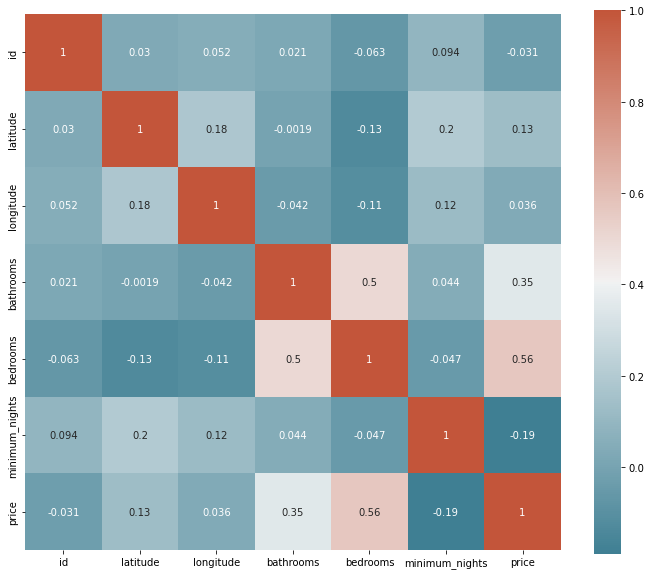

In [39]:
corr_df = clean_set_df.corr()
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=corr_df, square=True, annot=True, cbar=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

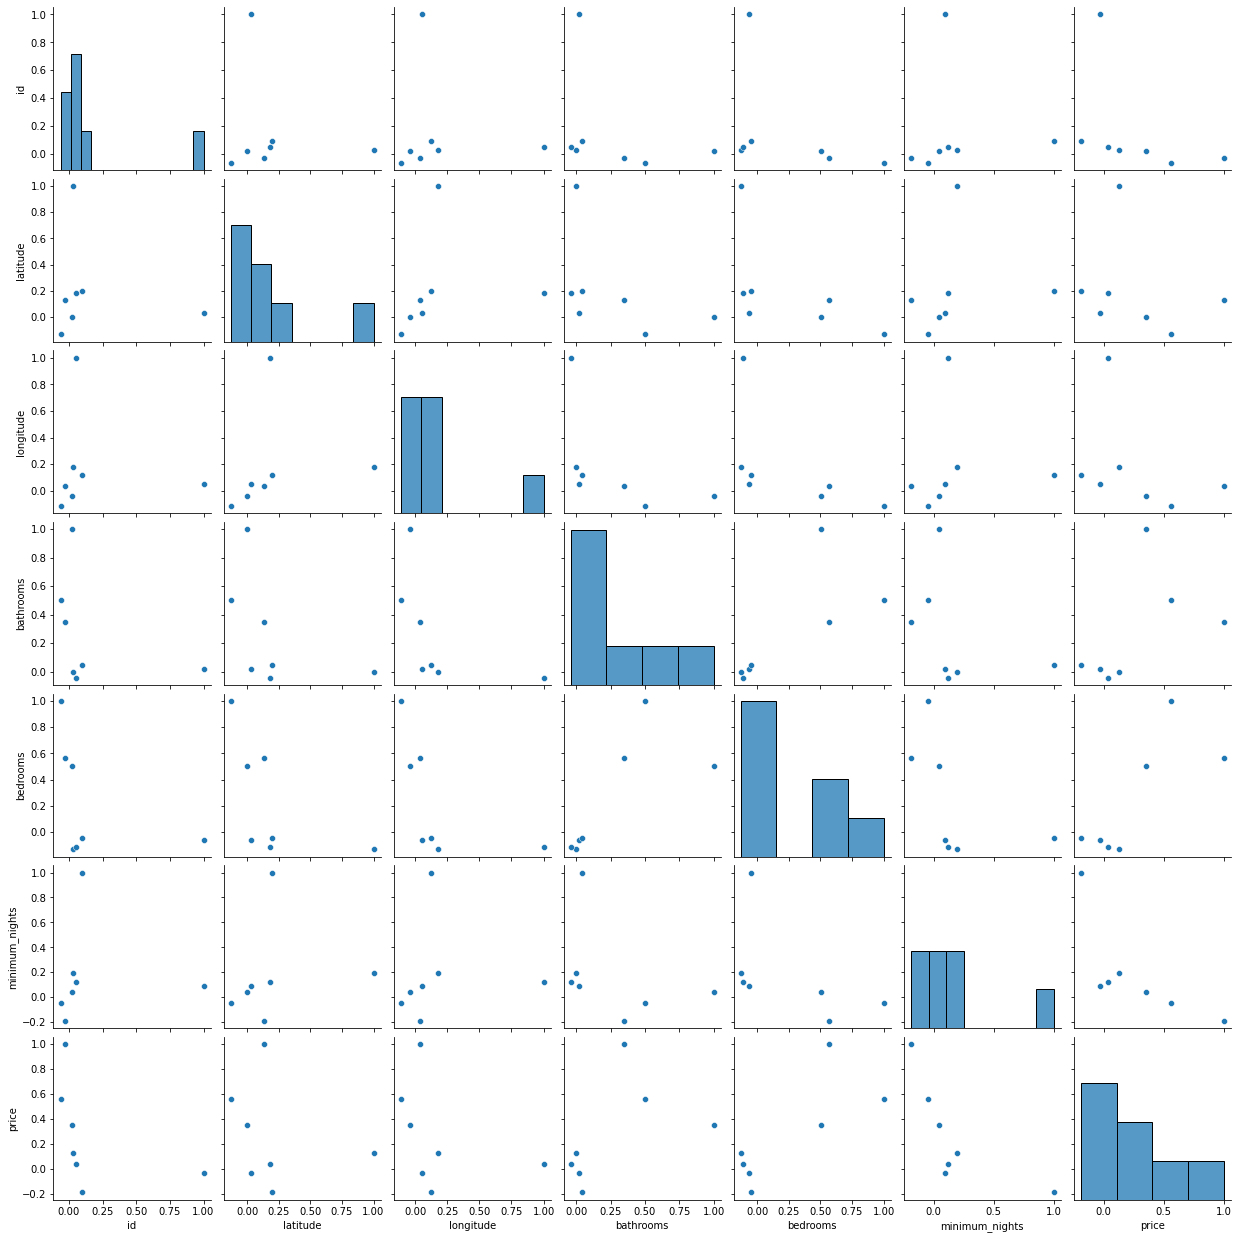

In [40]:
fig.set_size_inches(10,10)
sns.pairplot(corr_df)
plt.show()

In [41]:
cheap_price_df = rentals_df[rentals_df.price < 350]
cheap_price_df

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170.0
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235.0
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,65.0
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,65.0
...,...,...,...,...,...,...,...,...,...
8105,39340025,37.70463,-122.46288,House,Private room,0.0,1.0,1,100.0
8107,39343373,37.77799,-122.42159,Condominium,Entire home/apt,1.0,1.0,1,200.0
8108,39344101,37.73410,-122.38917,Hut,Private room,2.0,1.0,30,69.0
8109,39350028,37.78144,-122.41207,Apartment,Entire home/apt,1.0,1.0,30,187.0


### Train Test Split

In [42]:
cheap_price_df.select_dtypes('object').columns

Index(['property_type', 'room_type'], dtype='object')

In [43]:
cheap_price_df.columns

Index(['id', 'latitude', 'longitude', 'property_type', 'room_type',
       'bathrooms', 'bedrooms', 'minimum_nights', 'price'],
      dtype='object')

In [44]:
X = cheap_price_df.iloc[:, [1,2,3,4,5,6,7]]
y = cheap_price_df.iloc[:,8]
print("Shape of X - {}".format(X.shape))
print("Shape of y - {}".format(y.shape))

Shape of X - (7077, 7)
Shape of y - (7077,)


In [45]:
# Splitting the data into Train Test 
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [46]:
categorical_var = ['property_type', 'room_type']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_var]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[categorical_var]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_var, axis=1)
num_X_test = X_test.drop(categorical_var, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [47]:
print("Shape of training Data - {}".format(OH_X_train.shape))
print("Shape of test Data - {}".format(OH_X_test.shape))

Shape of training Data - (5661, 34)
Shape of test Data - (1416, 34)


In [48]:
minmax = MinMaxScaler(feature_range=[0,1])
scaled_X_train = minmax.fit_transform(OH_X_train)
scaled_X_test = minmax.transform(OH_X_test)

In [49]:
from sklearn.preprocessing import StandardScaler
stander = StandardScaler()
scaled_X_train = stander.fit_transform(OH_X_train)
scaled_X_test = stander.transform(OH_X_test)

In [50]:
print("Shape of final X_train - {}".format(scaled_X_train.shape))

Shape of final X_train - (5661, 34)


## Defining BaseLine model 

<p> We will start with the basic Linear Regression model. Inorder to form a baseline that will be used to compare our future evaluations </p>

In [51]:
lreg = LinearRegression(n_jobs=-1)
lreg.fit(scaled_X_train,y_train)

# Use logreg to predict instances from the test set and store it
y_pred = lreg.predict(scaled_X_test)

rsme = MSE(y_test,y_pred) ** (1/2)
print("RSME of the base model - {}".format(rsme))


RSME of the base model - 1306690549564.1877


In [52]:
def get_models():
    model = dict()
    model['LR'] = LinearRegression()
    model['CART'] = DecisionTreeRegressor()
    model['RF'] = RandomForestRegressor()
    model['GBM'] = GradientBoostingRegressor()
    return model

In [53]:
def evaluate_model(X,y,model):    
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)    
    score = (np.mean(scores)*-1)**(1/2)
    return score

In [54]:
models = get_models()
results = dict()
for key,value in models.items():
    results[key] = evaluate_model(scaled_X_train,y_train,value)    
    print('>%s %.3f' % (key, results[key]))

>LR 5184076233741.941
>CART 61.131
>RF 46.335
>GBM 47.116


### Using the best fit Model and Tuning it using HyperParameters
From the above analysis we see that RandomForest Regressor gave us the lowest RSME amongst all the ones compared on our training dataset. We will try to do hyperparameter tuning inorder to achieve the best possible results and values that fit our dataset. 

In [55]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 4)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 3)]
max_depth.append(None)

In [56]:
# Create the params grid
param_grid = {'n_estimators': n_estimators,               
               'max_depth': max_depth
             }

In [57]:
gm_cv = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid= param_grid,cv = 5,n_jobs=-1)
gm_cv.fit(scaled_X_train,y_train)
print(gm_cv.best_params_)

{'max_depth': 5, 'n_estimators': 500}


In [58]:
y_gm_cv_preds = gm_cv.predict(scaled_X_test)
r2 = gm_cv.score(scaled_X_test,y_test)
rsme_hyp_gm_cv = MSE(y_test,y_gm_cv_preds)**(1/2)
print("Tuned RandomForest Regressor RMSE: {}".format(rsme_hyp_gm_cv))
print("Tuned RandomForest Regressor R2: {}".format(r2))

Tuned RandomForest Regressor RMSE: 46.57630717479199
Tuned RandomForest Regressor R2: 0.5683570675949311


In [59]:
exp_price_df = rentals_df[(rentals_df.price >= 400) & (rentals_df.price < 1000) ]
exp_price_df

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
5,8339,37.77525,-122.43637,House,Entire home/apt,1.5,2.0,6,875.0
18,17132,37.78647,-122.39072,Condominium,Entire home/apt,2.0,2.0,90,450.0
31,26408,37.77478,-122.43150,Apartment,Entire home/apt,2.0,4.0,2,450.0
75,60365,37.76966,-122.43496,House,Entire home/apt,2.0,3.0,4,475.0
77,62651,37.76245,-122.42432,House,Entire home/apt,2.5,3.0,3,950.0
...,...,...,...,...,...,...,...,...,...
8061,39282684,37.77749,-122.40833,Apartment,Entire home/apt,2.0,2.0,3,650.0
8087,39286789,37.77531,-122.42584,Apartment,Entire home/apt,2.0,2.0,30,435.0
8089,39286946,37.77593,-122.42500,Apartment,Entire home/apt,2.0,2.0,30,406.0
8098,39298655,37.77732,-122.43102,House,Entire home/apt,3.0,4.0,2,699.0


In [60]:
X = exp_price_df.iloc[:, [1,2,3,4,5,6,7]]
y = exp_price_df.iloc[:,8]
print("Shape of X - {}".format(X.shape))
print("Shape of y - {}".format(y.shape))

Shape of X - (652, 7)
Shape of y - (652,)


In [61]:
# Splitting the data into Train Test 
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [62]:
categorical_var = ['property_type', 'room_type']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_var]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[categorical_var]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_var, axis=1)
num_X_test = X_test.drop(categorical_var, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [63]:
print("Shape of training Data - {}".format(OH_X_train.shape))
print("Shape of test Data - {}".format(OH_X_test.shape))

Shape of training Data - (521, 24)
Shape of test Data - (131, 24)


In [64]:
minmax = MinMaxScaler(feature_range=[0,1])
scaled_X_train = minmax.fit_transform(OH_X_train)
scaled_X_test = minmax.transform(OH_X_test)

In [65]:
lreg = LinearRegression(n_jobs=-1)
lreg.fit(scaled_X_train,y_train)

# Use logreg to predict instances from the test set and store it
y_pred = lreg.predict(scaled_X_test)

rsme = MSE(y_test,y_pred) ** (1/2)
print("RSME of the base model - {}".format(rsme))


RSME of the base model - 191.0222950629612


In [66]:
models = get_models()
results = dict()
for key,value in models.items():
    results[key] = evaluate_model(scaled_X_train,y_train,value)    
    print('>%s %.3f' % (key, results[key]))

>LR 157.952
>CART 219.128
>RF 155.703
>GBM 158.855


In [67]:
gm_cv = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid= param_grid,cv = 5,n_jobs=-1)
gm_cv.fit(scaled_X_train,y_train)
print(gm_cv.best_params_)

{'max_depth': 1, 'n_estimators': 500}


In [68]:
y_gm_cv_preds = gm_cv.predict(scaled_X_test)
r2 = gm_cv.score(scaled_X_test,y_test)
rsme_hyp_gm_cv = MSE(y_test,y_gm_cv_preds)**(1/2)
print("Tuned RandomForest Regressor RMSE: {}".format(rsme_hyp_gm_cv))
print("Tuned RandomForest Regressor R2: {}".format(r2))

Tuned RandomForest Regressor RMSE: 169.3377978614561
Tuned RandomForest Regressor R2: -0.18139894873301654


In [69]:
# Plot of Precited vs Actual for the first 150 observation of Linear Regression model
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_gm_cv_preds[-150:]))), y=y_gm_cv_preds[-150:],
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test[-150:],
                         mode='lines',
                         name='True value'))

fig.show()